In [29]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('data.csv')
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


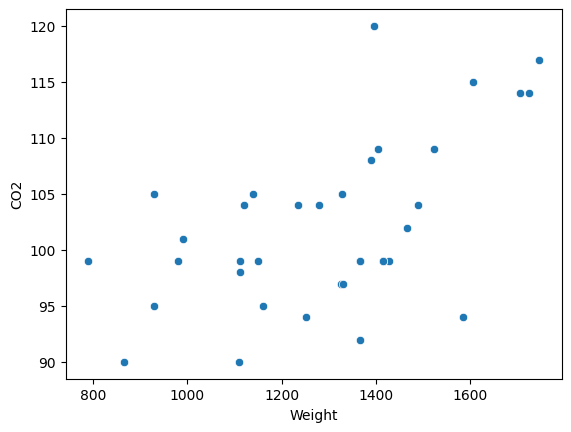

In [31]:
sns.scatterplot(data=df, x='Weight', y='CO2')
plt.show()

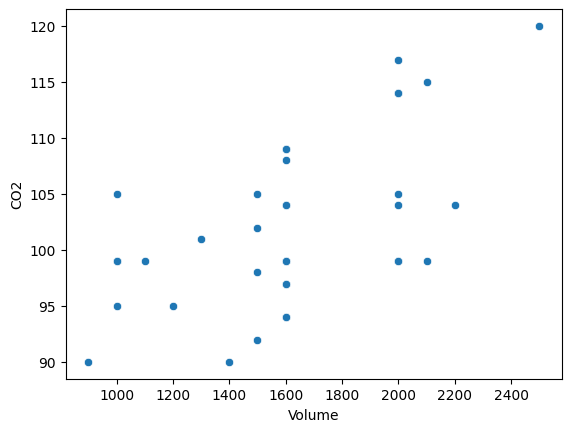

In [32]:
sns.scatterplot(data=df, x='Volume', y='CO2')
plt.show()

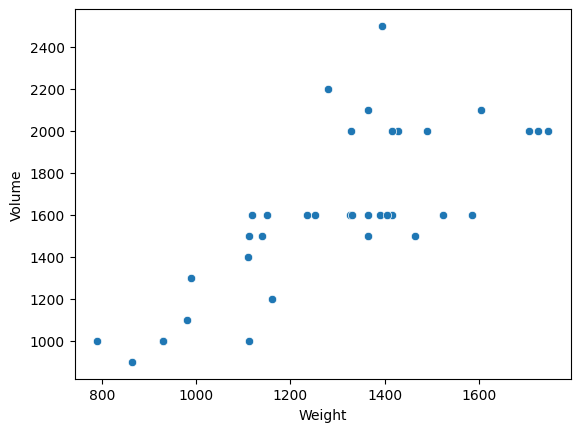

In [33]:
sns.scatterplot(data=df, x='Weight', y='Volume')
plt.show()

<Axes: >

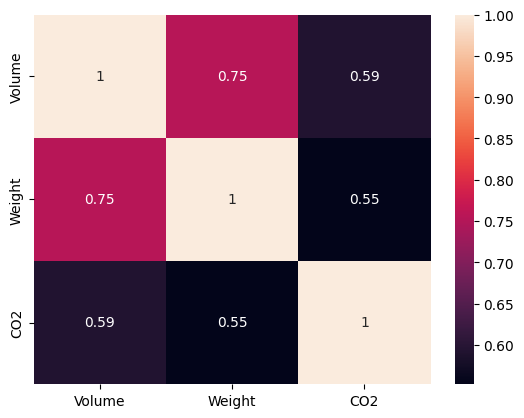

In [34]:
sns.heatmap(data=df.corr(numeric_only=True), annot=True)

In [35]:
x = df[['Volume', 'Weight']].to_numpy()
y = df['CO2'].to_numpy()

In [36]:
# Normalization
x = (x - np.min(x)) / (np.max(x) - np.min(x))

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((32, 2), (32,)), ((4, 2), (4,)))

In [38]:
class LinearRegressionClassifier:
    def __init__(self, lr=0.01, n_iters=100):
        self.lr = lr
        self.n_iters = n_iters
    

    def fit(self, x, y):
        if len(x.shape) == 1:
            self.n_params = 1
        else:
            self.n_params = x.shape[1]
        
        sample_size = x.shape[0]

        self.bias = 0.0
        self.params = np.random.uniform(low=0.5, high=1.5, size=self.n_params)


        for _ in range(self.n_iters):
            for i in range(sample_size):
                y_pred = np.dot(x[i], self.params.T) + self.bias
                for j in range(self.n_params):
                    self.params[j] -= self.lr * (y_pred - y[i]) * x[i][j]
                self.bias -= self.lr * (y_pred - y[i])
    


    def predict(self, x):
        return np.dot(x, self.params.T) + self.bias


In [44]:
clf = LinearRegressionClassifier(lr=0.01, n_iters=1000)
clf.fit(x_train, y_train)

In [45]:
clf.predict(x_test), y_test

(array([105.36206366, 100.93420726, 104.79263612, 106.35870901]),
 array([120,  94, 104, 115]))